In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Data Preparation

In [56]:
crypto_data = pd.read_csv('crypto_data.csv', index_col=0)

In [57]:
crypto_data

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
crypto_data['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
crypto_data = crypto_data.loc[crypto_data['IsTrading'] == True]

In [6]:
crypto_data

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
crypto_data = crypto_data.drop(['IsTrading'], axis=1)

In [8]:
crypto_data.isnull().values.ravel().sum()

459

In [9]:
crypto_data = crypto_data.dropna(how='any',axis=0) 

In [43]:
#crypto_data

In [11]:
crypto_data.dtypes

CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [12]:
crypto_data = crypto_data.loc[crypto_data['TotalCoinsMined'] > 0]

In [44]:
#crypto_data

In [14]:
crypto_data_df= crypto_data.drop(['CoinName'], axis=1)
crypto_data_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


### Dimensionality Reduction

In [15]:
crypto_dummies = pd.get_dummies(data=crypto_data_df, columns=['Algorithm', 'ProofType'])
crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Create a StandardScaler instances
crypto_dummies_scaled= StandardScaler().fit_transform(crypto_dummies)

In [17]:
# Applying PCA to reduce dimensions 

# Initialize PCA model
pca = PCA(n_components=3)

# Get three principal components for the crypto dummies data.
crypto_pca = pca.fit_transform(crypto_dummies_scaled )
crypto_pca


array([[-0.34600318,  0.97900453, -0.48206654],
       [-0.32934864,  0.97928321, -0.48245357],
       [ 2.31547379,  1.77302078, -0.76883078],
       ...,
       [ 0.33353108, -2.31772253,  0.39514947],
       [-0.13845185, -1.82993742,  0.27944197],
       [-0.30208235,  0.77598409, -0.18675949]])

In [18]:
# Transform PCA data to a DataFrame
crypto_pca_df= pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2","principal component 3" ], index=crypto_data.index
)
crypto_pca_df.head()

,principal component 1,principal component 2,principal component 3
42,-0.346003,0.979005,-0.482067
404,-0.329349,0.979283,-0.482454
1337,2.315474,1.773021,-0.768831
BTC,-0.138659,-1.339889,0.174968
ETH,-0.151073,-2.003434,0.397014


In [19]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02793108, 0.02139132, 0.02048156])

In [20]:
tsne = TSNE(learning_rate=100)

transformed_features = tsne.fit_transform(crypto_pca_df)

In [21]:
transformed_features.shape

(532, 2)

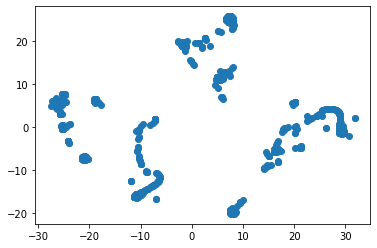

In [22]:
# Plot the results
plt.scatter(transformed_features[:,0], transformed_features[:,1])
plt.show()

### Cluster Analysis with k-Means

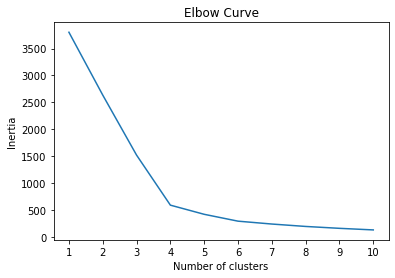

In [63]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    # Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### The best k value appears to be 4 so we would conclude on an output of 4 clusters to categorize the crytocurrencies.

In [24]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [46]:
clusters = get_clusters(4, crypto_pca_df)

In [47]:
clusters

,principal component 1,principal component 2,principal component 3,class
42,-0.346003,0.979005,-0.482067,0
404,-0.329349,0.979283,-0.482454,0
1337,2.315474,1.773021,-0.768831,0
BTC,-0.138659,-1.339889,0.174968,1
ETH,-0.151073,-2.003434,0.397014,1
...,...,...,...,...
ZEPH,2.481218,0.725930,-0.170805,1
GAP,-0.344049,0.978899,-0.482088,0
BDX,0.333531,-2.317723,0.395149,1
ZEN,-0.138452,-1.829937,0.279442,1


In [48]:
joined_Df = crypto_data.join(clusters)
joined_Df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,principal component 1,principal component 2,principal component 3,class
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-0.346003,0.979005,-0.482067,0
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.329349,0.979283,-0.482454,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,2.315474,1.773021,-0.768831,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-0.138659,-1.339889,0.174968,1
ETH,Ethereum,Ethash,PoW,1.076842e+08,0,-0.151073,-2.003434,0.397014,1
...,...,...,...,...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000,2.481218,0.725930,-0.170805,1
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.344049,0.978899,-0.482088,0
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610,0.333531,-2.317723,0.395149,1
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000,-0.138452,-1.829937,0.279442,1


In [49]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    joined_Df,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"]
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

### Recommendation

#### Out of 532 tradable Cryptocurrencies we have, from unsupervised machine learning analysis we can cluster them together. From above analysis we can see that cryptocurrencies can be categorized into 4 clusters. 

#### We see an outlier in our dataset in the 3d scatter plot. K-means can be quite sensitive to outliers in a data set. The reason is simply that k-means tries to optimize the sum of squares.And thus a large deviation (such as of an outlier) gets a lot of weight. We can identify the outliers like the unique cryptocurrency in the class #2.

#### BitTorrent is the only Cryptocurrency in class#2

In [62]:
crypto_data.loc[crypto_data["CoinName"] == "BitTorrent"]

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
BTT,BitTorrent,TRC10,True,DPoS,9.899887e+11,990000000000
